# Section 3.1 — Estimates and estimators

This notebook contains the code examples from [Section 3.1 Estimates and estimators]() of the **No Bullshit Guide to Statistics**.

We'll begin our study of inferential statistics by introducing **estimators**,
which are the math tools used for computing **confidence intervals** and running **hypothesis tests**.

![simplified_estimators.png](../stats_overview/figures/simplified_estimators.png)

#### Notebook setup

In [1]:
# load Python modules
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Plot helper functions
from plot_helpers import plot_pdf
from plot_helpers import savefigure

In [3]:
# Figures setup
plt.clf()  # needed otherwise `sns.set_theme` doesn't work
from plot_helpers import RCPARAMS
RCPARAMS.update({'figure.figsize': (10, 3)})   # good for screen
# RCPARAMS.update({'figure.figsize': (5, 1.6)})  # good for print
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc=RCPARAMS,
)

# Useful colors
snspal = sns.color_palette()
blue, orange, purple = snspal[0], snspal[1], snspal[4]

# High-resolution please
%config InlineBackend.figure_format = 'retina'

# Where to store figures
DESTDIR = "figures/stats/estimators"

<Figure size 432x288 with 0 Axes>

In [4]:
# set random seed for repeatability
np.random.seed(42)

In [5]:
#######################################################

$\def\stderr#1{\mathbf{se}_{#1}}$
$\def\stderrhat#1{\hat{\mathbf{se}}_{#1}}$
$\newcommand{\Mean}{\textbf{Mean}}$
$\newcommand{\Var}{\textbf{Var}}$
$\newcommand{\Std}{\textbf{Std}}$
$\newcommand{\Freq}{\textbf{Freq}}$
$\newcommand{\RelFreq}{\textbf{RelFreq}}$
$\newcommand{\DMeans}{\textbf{DMeans}}$
$\newcommand{\Prop}{\textbf{Prop}}$
$\newcommand{\DProps}{\textbf{DProps}}$


(this cell contains the macro definitions $\stderr{\theta}$, $\stderrhat{}$, $\Mean$, ...)

## Statistical inference context

DATA:
- population
- sample
- statistic

PROB:
- probability model
- model family
- parameters


Statistical inference is the use the values of the statistics obtained from the sample $\mathbf{x} = (x_1, x_2, \ldots, x_n)$ to estimate the population parameters $\theta$. For example,
the sample mean $\overline{\mathbf{x}}=\Mean(\mathbf{x})$ is an estimate of the population mean $\mu$,
and the sample variance $s_{\mathbf{x}}^2=\Var(\mathbf{x})$ is an estimate of the population variance $\sigma^2$.

## Estimators

- We use the term "estimator" to describe a function $g$ that takes samples as inputs
  and produces parameter estimates as outputs.
  Written mathematically, and estimator is a function of the form:
  $$
   g \colon \underbrace{\mathcal{X}\times \mathcal{X}\times \cdots \times \mathcal{X}}_{n \textrm{ copies}}
   \quad \to \quad \mathbb{R},
  $$
  where $n$ is the samples size and $\mathcal{X}$ denotes the possible values of the random variable $X$.
- We give different names to estimates, depending on the use case:
  - **statistic** = a quantity computed from a sample (e.g. descriptive statistics)
  - **parameter estimates** = statistics that estimate population parameters
  - **test statistic** = an estimate used as part of hypothesis testing procedure
- The **value** of the estimator $\hat{\theta} = g(\mathbf{x})$ is computed from a particular sample
  $\mathbf{x} = (x_1, x_2, \ldots, x_n)$.
- The **sampling distribution** of the estimator $g$ is the distribution of $\hat{\Theta} = g(\mathbf{X})$,
  where $\mathbf{X} = (X_1, X_2, \ldots, X_n)$ is a *random sample*.

Let's start with some estimators you're already familiar with (discussed in [descriptive statistics](./13_descriptive_statistics.ipynb)):

### Sample mean estimator

  - estimator: $\overline{\mathbf{x}} = \Mean(\mathbf{x}) = \frac{1}{n}\sum_{i=1}^n x_i$
  - gives an estimate for the population mean $\mu$

In [6]:
def mean(sample):
    return sum(sample) / len(sample)

# ALT. use .mean() method on a Pandas series
# ALT. use np.mean(sample)

### Sample variance and standard deviation

  - estimator: $s_{\mathbf{x}}^2 = \Var(\mathbf{x}) = \frac{1}{n-1}\sum_{i=1}^n (x_i-\overline{\mathbf{x}})^2$
  - gives an estimate for the population variance $\sigma^2$
  - note the denominator is $(n-1)$ and not $n$ 

In [7]:
def var(sample):
    xbar = mean(sample)
    sumsqdevs = sum([(xi-xbar)**2 for xi in sample])
    return sumsqdevs / (len(sample)-1)

# ALT. use .var() method on a Pandas series
# ALT. use np.var(sample, ddof=1)

The standard deviation $s_{\mathbf{x}}^2$ is the square root of the sample variance:
$$
  \sqrt{s_{\mathbf{x}}^2}
   =  s_{\mathbf{x}}
   = \Std(\mathbf{x})
   = \sqrt{ \frac{1}{n-1}\sum_{i=1}^n (x_i-\overline{\mathbf{x}})^2 }.
$$

We can now define a Python function `std` for computing the standard deviation by taking the square root of the variance:

In [8]:
def std(sample):
    s2 = var(sample)
    return np.sqrt(s2)

# ALT. use .std() method on a Pandas series
# ALT. use np.std(sample, ddof=1)

### Example 1: apple weight mean and variance


In [9]:
apples = pd.read_csv("../datasets/apples.csv")
asample = apples["weight"]
asample.count()

30

In [10]:
type(asample)

pandas.core.series.Series

In [11]:
# asample

In [12]:
type(asample.values)

numpy.ndarray

In [13]:
asample.values

array([205., 182., 192., 189., 217., 192., 210., 240., 225., 191., 193.,
       209., 167., 183., 210., 198., 239., 188., 179., 182., 200., 197.,
       245., 192., 201., 218., 198., 211., 208., 217.])

Next let's calculate the mean of the sample:

In [14]:
mean(asample)

202.6

Let's also calculate the variance of the apple weights,

In [15]:
var(asample)

345.9724137931035

and their standard deviation:

In [16]:
std(asample)

18.60033370112223

In [17]:
# ALT. call `.describe` to get a five-point summary
asample.describe()

count     30.000000
mean     202.600000
std       18.600334
min      167.000000
25%      191.250000
50%      199.000000
75%      210.750000
max      245.000000
Name: weight, dtype: float64

### Example 2: kombucha volume mean and variance


In [18]:
kombucha = pd.read_csv("../datasets/kombucha.csv")
# kombucha

In [19]:
batch01 = kombucha[kombucha["batch"]==1]
ksample = batch01["volume"]
ksample.count()

40

In [20]:
ksample.values

array([1016.24,  993.88,  994.72,  989.27, 1008.65,  976.98, 1017.45,
        992.39, 1003.19,  997.51, 1014.62,  979.4 ,  996.78,  996.16,
       1011.34,  989.  ,  998.28,  991.22, 1000.42, 1005.83,  988.99,
       1011.45, 1009.02, 1005.02, 1009.01,  993.16,  998.77,  990.64,
        997.32, 1005.3 ,  993.08,  996.03,  993.13,  991.55,  993.29,
        999.87,  988.83, 1002.34, 1016.6 , 1007.42])

In [21]:
mean(ksample)

999.10375

In [22]:
var(ksample)

95.43654198717958

In [23]:
std(ksample)

9.769162808919686

### Difference between sample means estimator

We'll now discuss an estimators that is specific for the comparison of the two groups.

  - estimator: $\hat{d} = \DMeans(\mathbf{x}_A, \mathbf{x}_B) = \Mean(\mathbf{x}_A) - \Mean(\mathbf{x}_B) = \overline{\mathbf{x}}_A - \overline{\mathbf{x}}_B$
  - gives an estimate for the difference between population means: $\Delta =  \mu_A - \mu_B$

In [24]:
def dmeans(xsample, ysample):
    """
    Compute the difference between group means of the samples.
    """
    dhat = mean(xsample) - mean(ysample)
    return dhat

### Example 3: comparison of electricity prices

Let's compute the difference between means of the East and West electricity prices.

In [25]:
eprices = pd.read_csv("../datasets/eprices.csv")
print(str(eprices))

     end  price
0   East    7.7
1   East    5.9
2   East    7.0
3   East    4.8
4   East    6.3
5   East    6.3
6   East    5.5
7   East    5.4
8   East    6.5
9   West   11.8
10  West   10.0
11  West   11.0
12  West    8.6
13  West    8.3
14  West    9.4
15  West    8.0
16  West    6.8
17  West    8.5


In [26]:
epricesW = eprices[eprices["end"]=="West"]
pricesW = epricesW["price"]
pricesW.values

array([11.8, 10. , 11. ,  8.6,  8.3,  9.4,  8. ,  6.8,  8.5])

In [27]:
epricesE = eprices[eprices["end"]=="East"]
pricesE = epricesE["price"]
pricesE.values

array([7.7, 5.9, 7. , 4.8, 6.3, 6.3, 5.5, 5.4, 6.5])

Let's calculate the mean of the prices in the East and the West:

In [28]:
mean(pricesW), mean(pricesE)

(9.155555555555555, 6.155555555555555)

To calculate the difference between means,
we can simply subtract these two numbers $\hat{d} = \overline{\mathbf{x}}_W - \overline{\mathbf{x}}_E$,
or simply call the function `dmeans`
which computes the estimate $\hat{d} = \textbf{DMeans}(\tt{pricesW}, \tt{pricesE})$.

In [29]:
dmeans(pricesW, pricesE)

3.0

According to this estimate,
the average price Rob can expect in the East end is three cents cheaper,
on average,
as compared to the average electricity price in the West.


## Sampling distributions


TODO import definitions


### Examples of sampling distributions

Let's look at the same estimators that we described in the previous section,
but this time applied to *random* samples of size $n$:

- Sample mean: $\overline{\mathbf{X}} = \Mean(\mathbf{X}) = \tfrac{1}{n}\sum_{i=1}^n X_i$
- Sample variance: $S_{\mathbf{X}}^2 = \Var(\mathbf{X}) = \tfrac{1}{n-1}\sum_{i=1}^n \left(X_i - \overline{\mathbf{X}} \right)^2$
- Sample standard deviation: $S_{\mathbf{X}} = \sqrt{\Var(\mathbf{X})} = \sqrt{\tfrac{1}{n-1}\sum_{i=1}^n \left(X_i - \overline{\mathbf{X}} \right)^2}$
- Difference between sample means: $\hat{D} = \DMeans(\mathbf{X}, \mathbf{Y}) = \overline{\mathbf{X}} - \overline{\mathbf{Y}}$ 

Note these formulas is identical to the formulas we saw earlier.
The only difference is that we're calculating the functions $g$, $h$, and $d$ based on a random sample $\mathbf{X} = (X_1, X_2, \ldots, X_n)$,
instead of particular sample $\mathbf{x} = (x_1, x_2, \ldots, x_n)$.

### Visualizing sampling distributions



In [30]:
def gen_sampling_dist(rv, statfunc, n, N=10000):
    stats = []
    for i in range(0, N):
        sample = rv.rvs(n)
        stat = statfunc(sample)
        stats.append(stat)
    return stats

#### Example 1 (cont): sampling distribution of the mean kombucha volume

The probability distribution of the kombucha volume is know to
be $K \sim \mathcal{N}(\mu_K=1000, \sigma_K=10)$.


This is an usual case where we know the population parameters,
but we'll investigate because it allows us to learn more about sampling distributions.

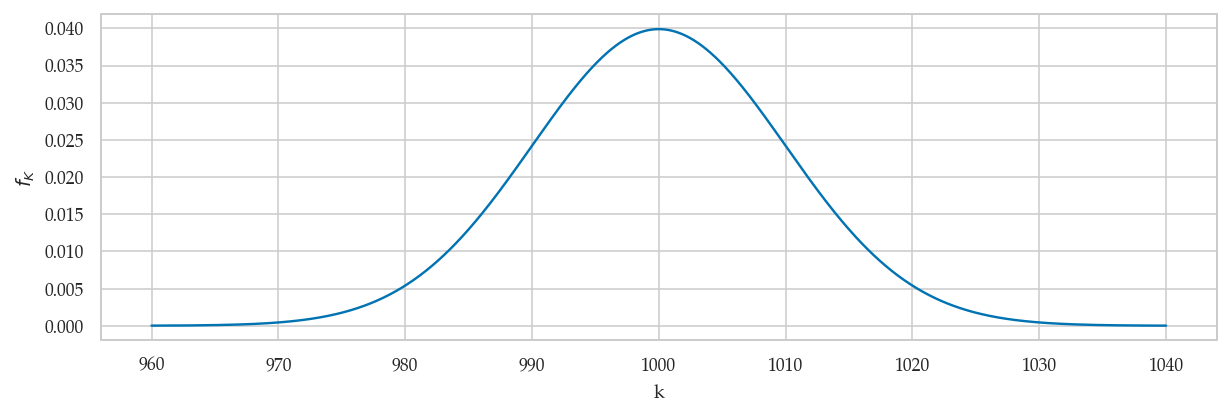

In [31]:
from scipy.stats import norm
muK = 1000
sigmaK = 10
rvK = norm(muK, sigmaK)

_ = plot_pdf(rvK, xlims=[960,1040], rv_name="K")

##### Sampling distribution of the sample mean

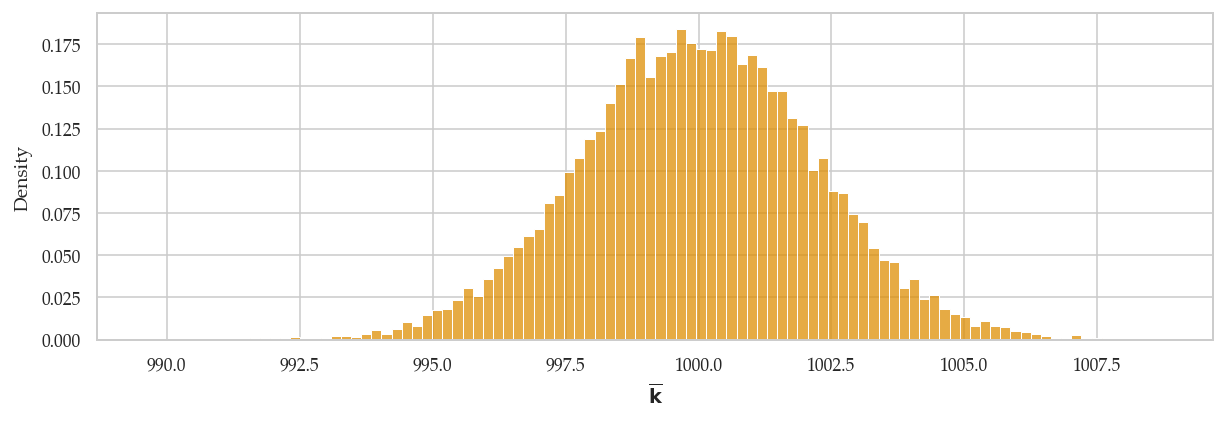

In [32]:
np.random.seed(43)
kbars = gen_sampling_dist(rvK, statfunc=mean, n=20)
ax = sns.histplot(kbars, stat="density", bins=100, color=orange)
_ = ax.set_xlabel("$\overline{\mathbf{k}}$")

In [33]:
filename = os.path.join(DESTDIR, "sampling_dist_mean_rvK_n20.pdf")
savefigure(ax, filename)

Saved figure to figures/stats/estimators/sampling_dist_mean_rvK_n20.pdf
Saved figure to figures/stats/estimators/sampling_dist_mean_rvK_n20.png


In [34]:
# observed,        expected    
np.mean(kbars),    muK

(999.9759718368696, 1000)

Let's calculate the variance 

In [35]:
# observed              expected
np.std(kbars,ddof=1),   

(2.208170264354007,)

In [36]:
sigmaK / np.sqrt(20)

2.23606797749979

##### Sampling distribution of the sample variance

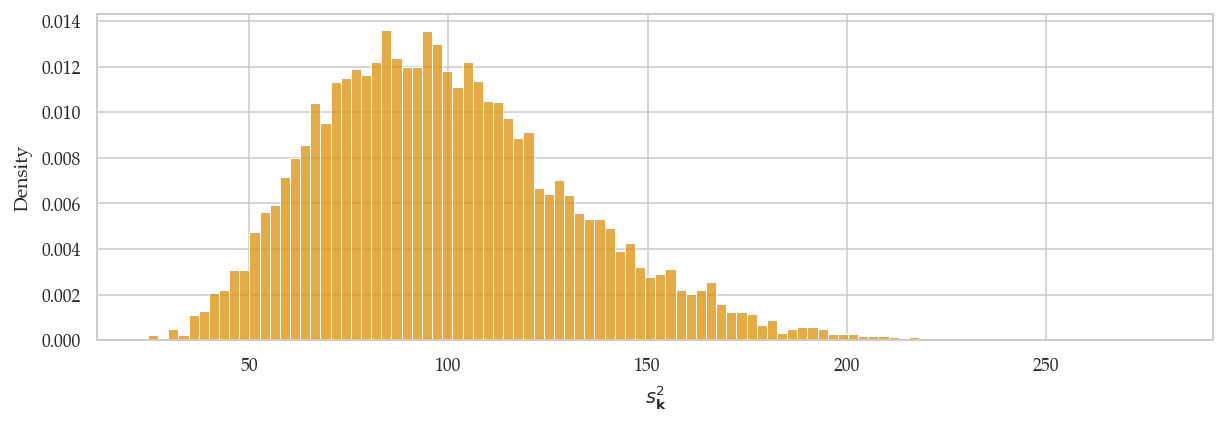

In [37]:
np.random.seed(44)
kvars = gen_sampling_dist(rvK, statfunc=var, n=20)
ax = sns.histplot(kvars, stat="density", bins=100, color=orange)
_ = ax.set_xlabel("$s^2_{\mathbf{k}}$")

In [38]:
filename = os.path.join(DESTDIR, "sampling_dist_var_rvK_n20.pdf")
savefigure(ax, filename)

Saved figure to figures/stats/estimators/sampling_dist_var_rvK_n20.pdf
Saved figure to figures/stats/estimators/sampling_dist_var_rvK_n20.png


In [39]:
# observed        expected    
np.mean(kvars),   sigmaK**2

(99.39922540353122, 100)

### EDITME

##### Ground truth for estimates

Let's generate a particular sample to use in examples.

In [40]:
kombucha = pd.read_csv("../datasets/kombucha.csv")
batch02 = kombucha[kombucha["batch"]==2]
ksample02 = batch02["volume"]

In [41]:
mean(ksample02)

997.9069999999999

In [42]:
var(ksample02), std(ksample02)

(124.31760105263136, 11.149780314097285)

#### EDITME


##### Ground truth for sampling distributions

The sampling distribution graphs we saw above represent the true sampling distributions
for the estimators $\Mean$, $\Var$, etc.,
generated from samples of size $n=20$ from the population
$K \sim \mathcal{N}(\mu_K=1000, \sigma_K=10)$.

We can therefore use them as the "ground truth" for the approximations techniques
we'll learn about in the next two subsections.

### Estimator properties

- **bias**
- **variance**
  The square root of the variance of an estimator is called the **standard error**.


![bias and variance](attachments/stats/estimators/bias_and_variance_targets.png)

### Analytical approximation formulas

We can use probability theory formulas to come up with approximations
for certain sampling distributions.

### Bootstrap estimation

In [43]:
#######################################################
def bootstrap_stat(sample, statfunc, B=5000):
    """
    Compute the sampling distribiton of `statfunc`
    from `B` bootstrap samples generated from `sample`.
    """
    n = len(sample)
    bstats = []
    for i in range(0, B):
        bsample = np.random.choice(sample, n, replace=True)
        bstat = statfunc(bsample)
        bstats.append(bstat)
    return bstats

### EDIT ME

#### Approximations 



Recall the sample `ksample02` that comes from Batch 02 of the kombucha bottling plant.

In [44]:
# ksample02

In [45]:
ksample02.mean()

997.9070000000002

In [46]:
ksample02.var()

124.31760105263139

## Sampling distribution of the mean

The central limit theorem tells us everything we need to know about the sampling distribution of the sample mean estimator $\Mean$,
which corresponds to the random variable $\overline{\mathbf{X}} = \Mean(\mathbf{X})$.

The central limit theorem states that the sampling distribution of the mean 
converges to a normal distribution as $n$ goes to infinity:
$$
    \overline{\mathbf{X}}
    \quad \sim \quad
    \mathcal{N}\big(\mu_X, \tfrac{\sigma_X}{\sqrt{n}} \big).
$$
Note the central limit theorem gives a sampling distribution of the sample mean
computed from samples taken from **any** population $X \sim \mathcal{M}(\theta)$.

#### Verification of the CLT

The true sampling distribution of the sample mean generated using simulation
from thousands of samples of size $n=7$.

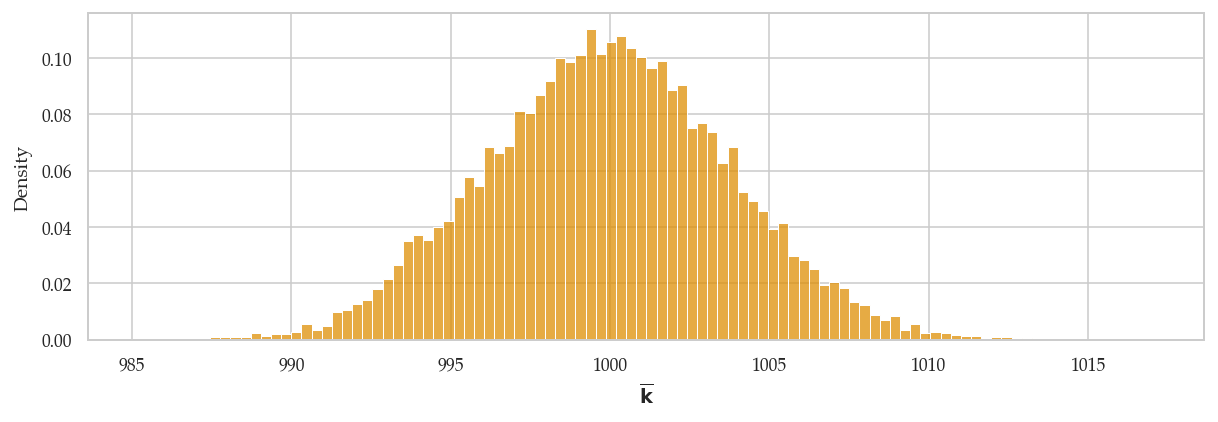

In [47]:
np.random.seed(48)
kbars7 = gen_sampling_dist(rvK, statfunc=mean, n=7)
ax = sns.histplot(kbars7, stat="density", bins=100, color=orange)
_ = ax.set_xlabel("$\overline{\mathbf{k}}$")

Let's now superimpose a lineplot of the analytical approximation formula
we obtain from the central limit theorem.

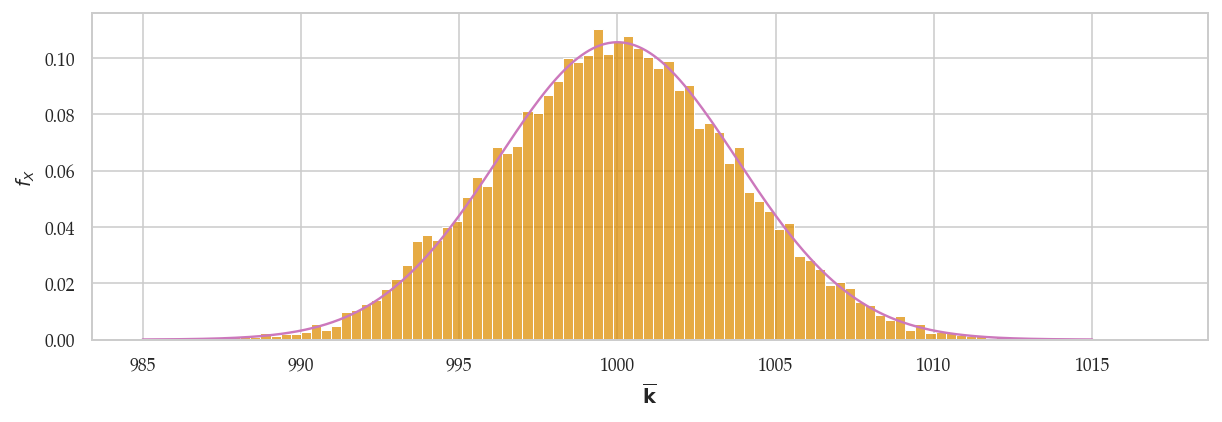

In [48]:
# mean equal to the population mean
muKbar = muK

# standard error (according to CLT)
seKbar = rvK.std() / np.sqrt(7)

# sampling distribution of the mean according to CLT
rvKbarCLT = norm(muKbar, seKbar)

# plot hist and pdf superimposed
ax = sns.histplot(kbars7, stat="density", bins=100, color=orange)
plot_pdf(rvKbarCLT, ax=ax, xlims=[985,1015], color=purple)
_ = ax.set_xlabel("$\overline{\mathbf{k}}$")

In [49]:
filename = os.path.join(DESTDIR, "sampling_dist_mean_rvK_simulation_and_CLT_n7.pdf")
savefigure(ax, filename)

Saved figure to figures/stats/estimators/sampling_dist_mean_rvK_simulation_and_CLT_n7.pdf
Saved figure to figures/stats/estimators/sampling_dist_mean_rvK_simulation_and_CLT_n7.png


#### Analysis for sample of size $n=7$

##### True sampling distribution of the sample mean
We start by running a simulation to obtain the true sampling distribution of the sample mean
for samples of size $n=7$ from the population $N \sim \mathcal{N}(1000,100)$.

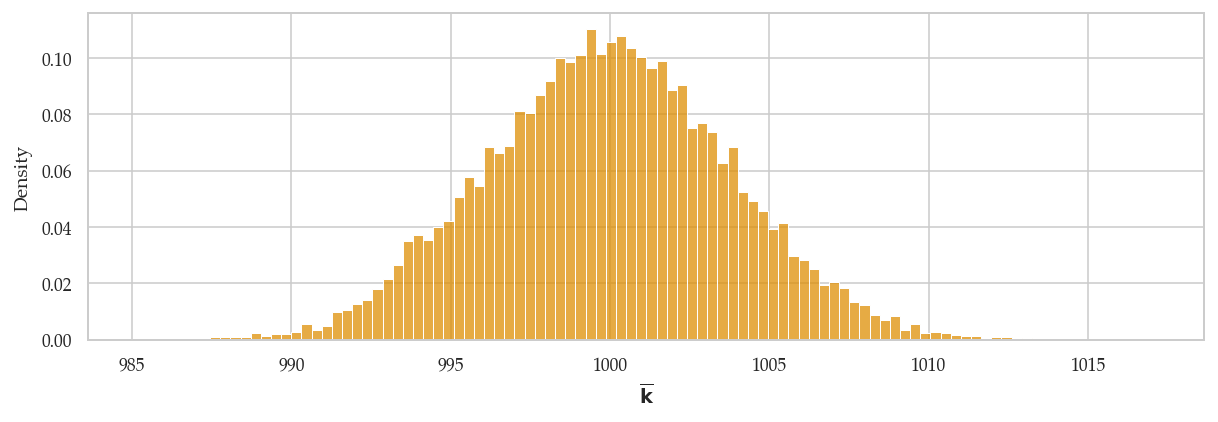

In [50]:
# np.random.seed(48)
# kbars7 = gen_sampling_dist(rvK, statfunc=mean, n=7, N=50000)
ax = sns.histplot(kbars7, stat="density", bins=100, color=orange)
_ = ax.set_xlabel("$\overline{\mathbf{k}}$")

##### A particular sample of size $n=7$

Next we generate a particular sample of size $n=7$,
which is analogous to the operation of a statistical analysis in the real world,
when we don't know the variance of the distribution.

In [51]:
kombucha = pd.read_csv("../datasets/kombucha.csv")
batch03 = kombucha[kombucha["batch"]==3]
ksample03 = batch03["volume"]
# ksample03

In [52]:
mean(ksample03)

1000.5371428571427

In [53]:
kstd7 = std(ksample03)
kstd7

8.519494731273129

In [54]:
# the true population standard deviation
sigmaK

10

##### Normal approximation to the sampling distribution

We now obtain the best normal approximation based on the estimated standard error `sehat`
that we computed from the data in `ksample03`.

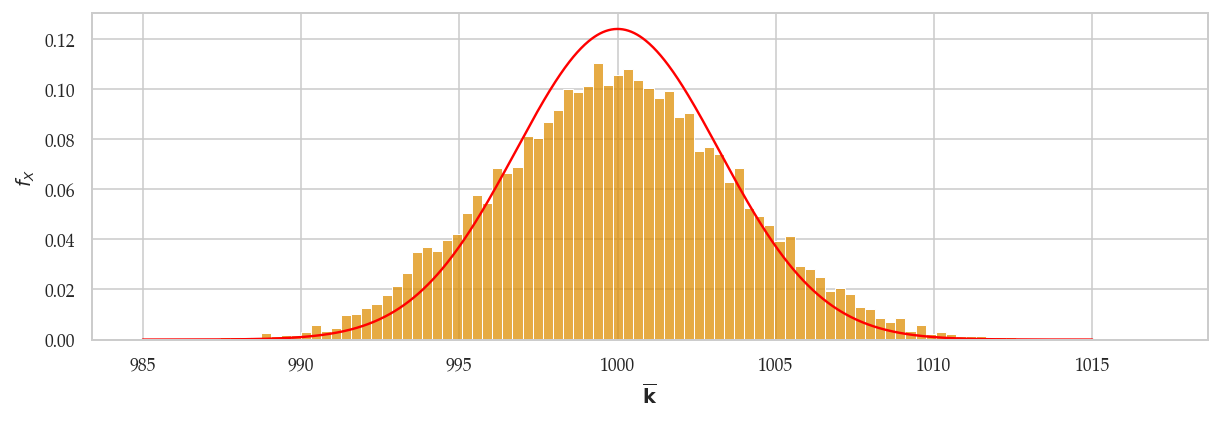

In [55]:
# standard error estimated from `ksample03`
sehat = std(ksample03) / np.sqrt(7)

rvNKbar = norm(muK, sehat)

ax = sns.histplot(kbars7, stat="density", bins=100, color=orange)
plot_pdf(rvNKbar, ax=ax, xlims=[985,1015], color="red")
_ = ax.set_xlabel("$\overline{\mathbf{k}}$")

In [56]:
filename = os.path.join(DESTDIR, "sampling_dist_mean_rvK_and_normal_approx_n7.pdf")
savefigure(ax, filename)

Saved figure to figures/stats/estimators/sampling_dist_mean_rvK_and_normal_approx_n7.pdf
Saved figure to figures/stats/estimators/sampling_dist_mean_rvK_and_normal_approx_n7.png


#### A better reference distribution

Obtain Student's $t$-distribution based on the estimated standard error `sehat`
that we computed from the data in `ksample03`.

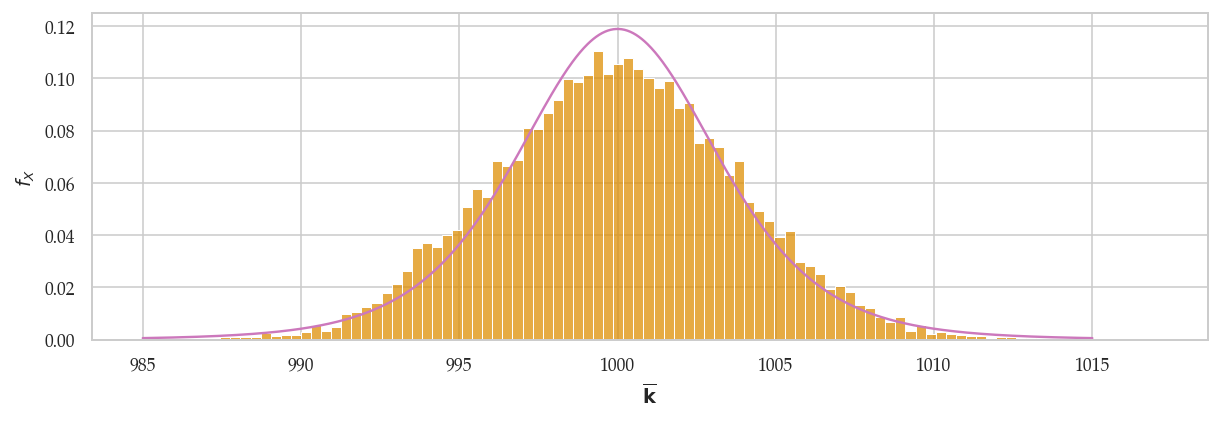

In [57]:
from scipy.stats import t as tdist

# standard error estimated from `ksample03`
sehat = std(ksample03) / np.sqrt(7)
df = 7 - 1  # (n-1) degrees of freedom

rvKbar = tdist(df, loc=muK, scale=sehat)

ax = sns.histplot(kbars7, stat="density", bins=100, color=orange)
plot_pdf(rvKbar, ax=ax, xlims=[985,1015], color=purple)
_ = ax.set_xlabel("$\overline{\mathbf{k}}$")

In [58]:
filename = os.path.join(DESTDIR, "sampling_dist_mean_rvK_and_T_approx_n7.pdf")
savefigure(ax, filename)

Saved figure to figures/stats/estimators/sampling_dist_mean_rvK_and_T_approx_n7.pdf
Saved figure to figures/stats/estimators/sampling_dist_mean_rvK_and_T_approx_n7.png


#### Bootstrapped sampling distribution of the sample mean

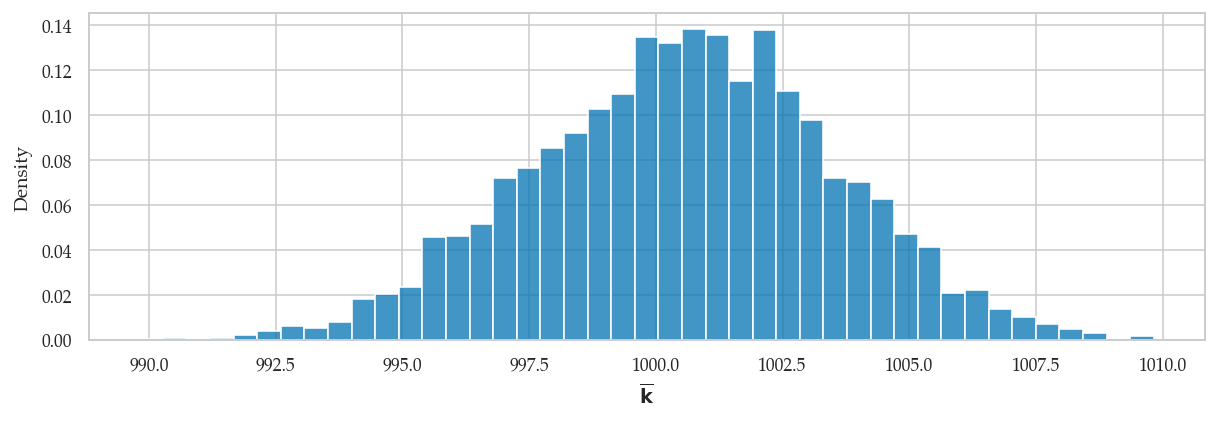

In [59]:
np.random.seed(48)
kbars7_boot = bootstrap_stat(ksample03, statfunc=mean)
ax = sns.histplot(kbars7_boot, stat="density")
_ = ax.set_xlabel("$\overline{\mathbf{k}}$")

In [60]:
filename = os.path.join(DESTDIR, "bootstrap_dist_mean_kombucha_ksample03.pdf")
savefigure(ax, filename)

Saved figure to figures/stats/estimators/bootstrap_dist_mean_kombucha_ksample03.pdf
Saved figure to figures/stats/estimators/bootstrap_dist_mean_kombucha_ksample03.png


The expected value and the standard error of the sampling distribution
we obtained using bootstrap estimation are:

In [61]:
np.mean(kbars7_boot), np.std(kbars7_boot, ddof=1)

(1000.5607797142856, 2.9676036319065293)

These numbers are pretty close to the true paramters,
which we obtained using simulation.

In [62]:
np.mean(kbars7), np.std(kbars7, ddof=1)

(999.9232910137121, 3.8212371387075468)

## Sample variance estimator

When the population is normally distributed $X \sim \mathcal{N}(\mu,\sigma)$,
the sampling distribution of the sample variance $S_{\mathbf{x}}^2$
is described by a scaled version of the chi-square distribution:
$$
    S_{\mathbf{x}}^2
    \;\; \sim \;\;
    \underbrace{\frac{ \sigma^2 }{ (n-1) } }_{\tt{scale}} \; \cdot \; \chi^2_{(n-1)}
$$
where $n$ is the sample size and $\chi^2_{(n-1)}$ is the chi-square distribution with $n-1$ degrees of freedom.

#### Sampling distribution of the variance

Let's start by plotting a histogram of the sampling distribution of the variance
computed from samples of size $n=20$ from the random variable `rvK` = $K \sim \mathcal{N}(\mu_K=1000,\sigma_K=10)$.

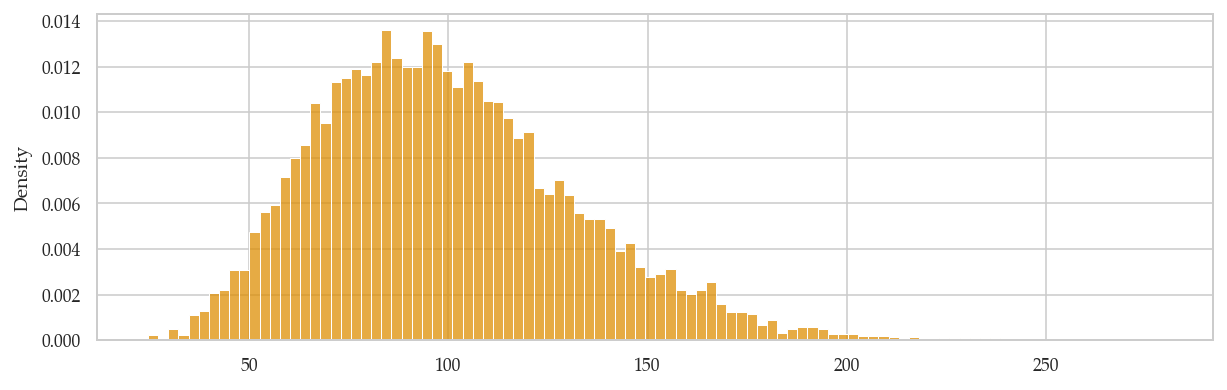

In [63]:
np.random.seed(44)
kvars20 = gen_sampling_dist(rvK, statfunc=var, n=20)
ax = sns.histplot(kvars20, stat="density", bins=100, color=orange)

Let's now superimpose the chi-square distribution with $20-1=19$ degrees of freedom,
with scale parameter set to $\sigma_N^2/(n-1)$.

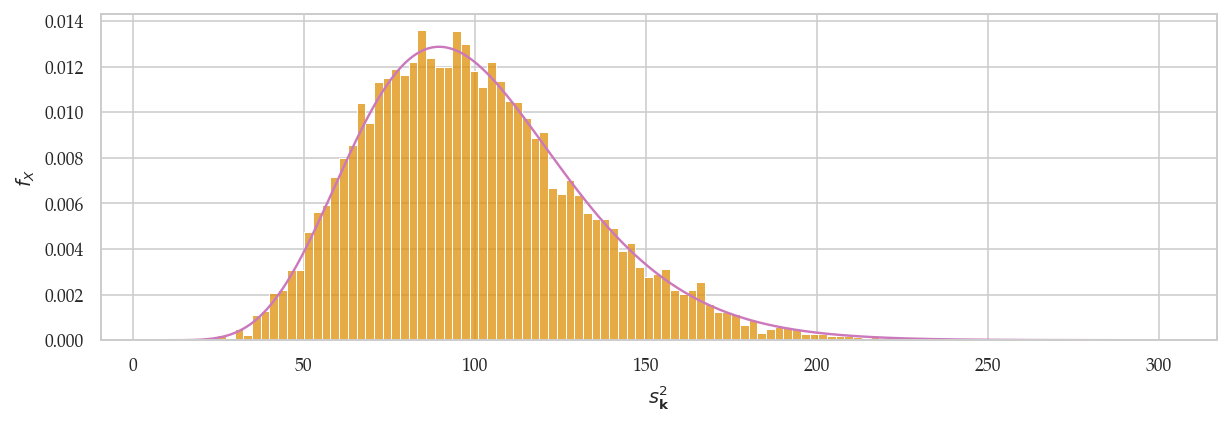

In [64]:
from scipy.stats import chi2

df = 20 - 1
scale = sigmaK**2 / (20-1)
rvS2 = chi2(df, loc=0, scale=scale)

ax = sns.histplot(kvars20, stat="density", bins=100, color=orange)
plot_pdf(rvS2, ax=ax, color=purple)
_ = ax.set_xlabel("$s^2_{\mathbf{k}}$")

In [65]:
filename = os.path.join(DESTDIR, "sampling_dist_var_rvK_and_X2_approx_n20.pdf")
savefigure(ax, filename)

Saved figure to figures/stats/estimators/sampling_dist_var_rvK_and_X2_approx_n20.pdf
Saved figure to figures/stats/estimators/sampling_dist_var_rvK_and_X2_approx_n20.png


#### Bootstrapped sampling distribution of the sample variance

In [66]:
var(ksample02), rvK.var()

(124.31760105263136, 100.0)

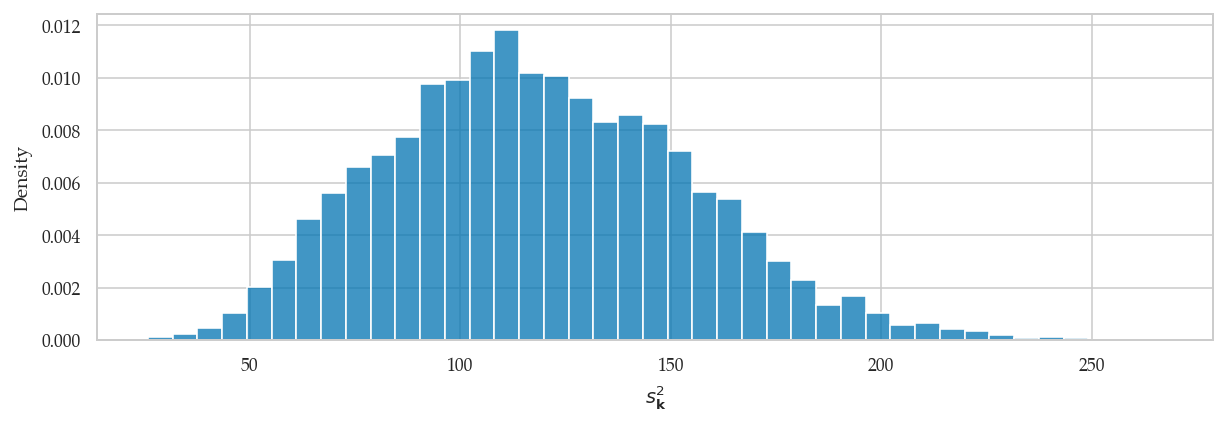

In [67]:
np.random.seed(49)
kvars20_boot = bootstrap_stat(ksample02, statfunc=var)
ax = sns.histplot(kvars20_boot, stat="density")
_ = ax.set_xlabel("$s^2_{\mathbf{k}}$")

In [68]:
filename = os.path.join(DESTDIR, "bootstrap_dist_var_kombucha_ksample02.pdf")
savefigure(ax, filename)

Saved figure to figures/stats/estimators/bootstrap_dist_var_kombucha_ksample02.pdf
Saved figure to figures/stats/estimators/bootstrap_dist_var_kombucha_ksample02.png


The expected value and the standard error of the sampling distribution
we obtained using bootstrap estimation are:

In [69]:
np.mean(kvars20_boot), np.std(kvars20_boot, ddof=1)

(118.6780201503156, 35.967557751577104)

The expected value is an underestimate of the true mean for the sampling distribution.

In [70]:
np.mean(kvars20)

99.39922540353122

The standard error $\stderrhat{s_{\mathbf{k}}^2}^b=35.97$ of the sampling distribution
is also an overestimate of the true standard error.

In [71]:
np.std(kvars20, ddof=1)

32.274956066682975

## Difference between means estimator


Consider two normally distributed random variables $X$ and $Y$:
$$ 
X \sim \mathcal{N}\!\left(\mu_X, \sigma_X \right)
\qquad
\textrm{and}
\qquad
Y \sim \mathcal{N}\!\left(\mu_Y, \sigma_Y \right)
$$
that describe the probability distribution for two groups.

- A sample of size $n$ from $X$ is denoted $\mathbf{x} = (x_1, x_2, \ldots, x_{n})$=`xsample`,
  and let $\mathbf{y} = (y_1, y_2, \ldots, y_{m})$=`ysample` be a random sample of size $m$ from $Y$.
- We can compute the mean in each group: $\overline{\mathbf{x}} = \Mean(\mathbf{x})$
  and $\overline{\mathbf{y}} = \Mean(\mathbf{y})$
- We can also compute the sample variance from each group:
   $s_{\mathbf{x}}^2 = \Var(\mathbf{x})$
   and $s_{\mathbf{y}}^2 = \Var(\mathbf{y})$.
- The value of the difference between means estimator is $\hat{d} = \DMeans(\mathbf{x}, \mathbf{y}) = \overline{\mathbf{x}} - \overline{\mathbf{y}}$.
  The value $\hat{d}$ is an estimate of the true different between
  population means $\Delta = \mu_X - \mu_Y$.


#### Sampling distribution of the estimator `dmeans`

Consider now the random samples $\mathbf{X} = (X_1, X_2, \ldots, X_{n})$
and $\mathbf{Y} = (Y_1, Y_2, \ldots, Y_{m})$.
The **sampling distribution** of the different between means estimator
is defined as
$$
  \hat{D} = \overline{\mathbf{X}} - \overline{\mathbf{Y}}.
$$

By definition, the sampling distribution of the estimator is obtained by repeatedly generating samples `xsample` and `ysample` from the two distributions and computing `dmeans` on the random samples. For example, we can obtain the sampling distribution by generating $N=1000$ samples.

#### Theoretical model for the sampling distribution

Let's now use probability theory to build a theoretical model for the sampling distribution of the difference-between-means estimator `dmeans`.

- The central limit theorem tells us the sample mean within the two group are
  $$
  \overline{\mathbf{X}} \sim \mathcal{N}\!\left(\mu_X, \tfrac{\sigma_X}{\sqrt{n}} \right)
  \qquad \textrm{and} \qquad
  \overline{\mathbf{Y}} \sim \mathcal{N}\!\left(\mu_Y, \tfrac{\sigma_Y}{\sqrt{m}} \right).
  $$

- The rules of probability theory tells us that the [difference of two normal random variables](https://en.wikipedia.org/wiki/Sum_of_normally_distributed_random_variables#Independent_random_variables) requires subtracting their means and adding their variance, so we get:
  $$
  \hat{D}
    \sim
    \mathcal{N}\!\left(
        \mu_X - \mu_Y, \;
        \sqrt{\tfrac{\sigma^2_X}{n} + \tfrac{\sigma^2_Y}{m}}
    \right).
  $$

In other words, the sampling distribution for the difference between means estimator $\hat{D}$ has mean and standard error given by:
$$ 
   \mu_{\hat{D}} = \Delta = \mu_X - \mu_Y
   \qquad \textrm{and} \qquad
   \stderr{\hat{D}} = \sqrt{ \tfrac{\sigma^2_X}{n} + \tfrac{\sigma^2_Y}{m}  }.
$$

#### Example 1 (continued): difference between electricity prices

Probability theory predicts the sampling distribution had mean ...

In [72]:
eprices = pd.read_csv("../datasets/eprices.csv")
pricesW = eprices[eprices["end"]=="West"]["price"]
pricesE = eprices[eprices["end"]=="East"]["price"]

# sample size and std in East
nW = pricesW.count()
stdW = pricesW.std()

# sample size and std in West
nE = pricesE.count()
stdE = pricesE.std()

In [73]:
seD = np.sqrt(stdW**2/nW + stdE**2/nE)
seD

0.5972674401486562

The degrees of freedom of is obtained by the following formula
$$
\nu_{\hat{d}}
    \;\; = \;\;
    \frac{ (\stderrhat{\overline{\mathbf{x}}}^2 + \stderrhat{\overline{\mathbf{y}}}^2)^2 }
        { \frac{\stderrhat{\overline{\mathbf{x}}}^4}{n-1} + \frac{\stderrhat{\overline{\mathbf{y}}}^4}{m-1}	}\;.
$$

Calculate the degrees of freedom parameter.

In [74]:
def calcdf(stdX, n, stdY, m):
    vX = stdX**2 / n
    vY = stdY**2 / m
    df = (vX + vY)**2 / (vX**2/(n-1) + vY**2/(m-1))
    return df

df = calcdf(stdW, nW, stdE, nE)
df

12.59281702723103

In [75]:
dhat = dmeans(pricesW, pricesE)
dhat

3.0

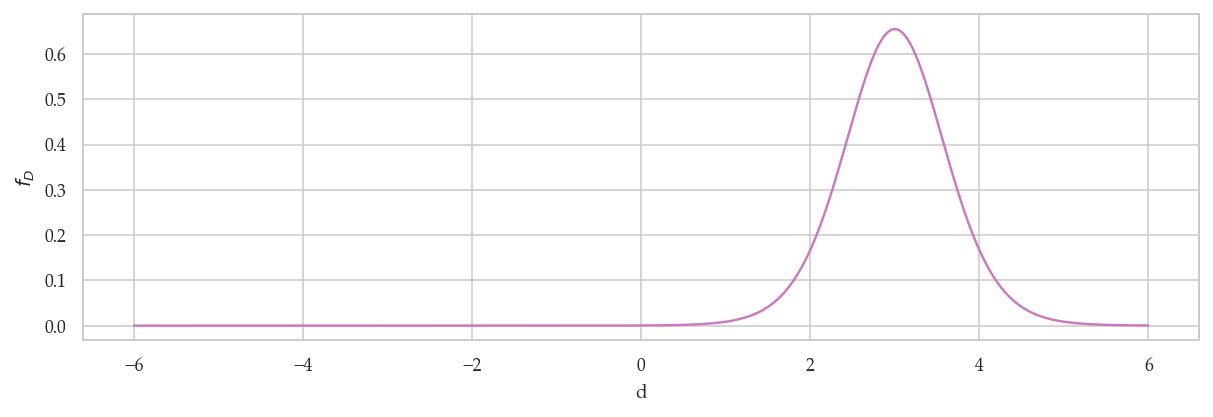

In [76]:
from scipy.stats import t as tdist
rvD = tdist(df, loc=dhat, scale=seD)
_ = plot_pdf(rvD, rv_name="D", xlims=[-6,6], color=purple)

#### Bootstrapped sampling distribution of the difference between means

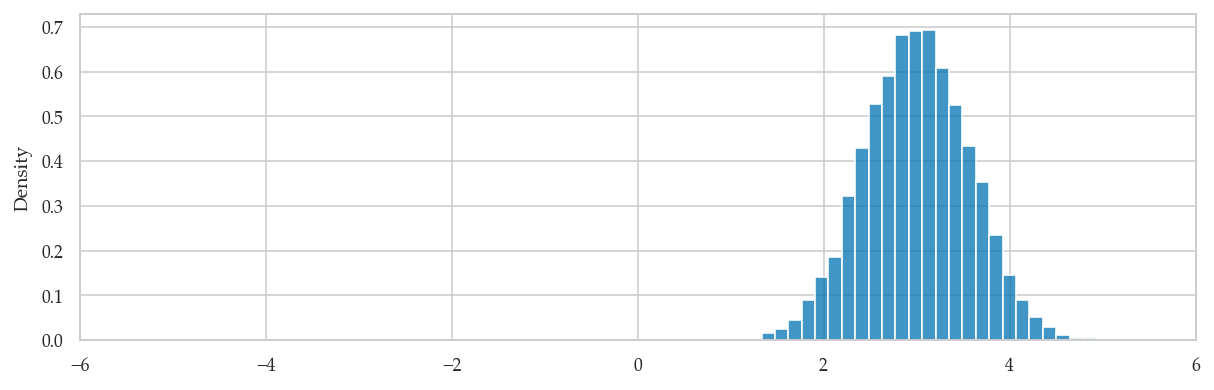

In [77]:
# compute bootstrap estimates for mean in each group
meanW_boot = bootstrap_stat(pricesW, statfunc=mean)
meanE_boot = bootstrap_stat(pricesE, statfunc=mean)

# compute the difference between means from bootstrap samples
dmeans_boot = []
for bmeanW, bmeanE in zip(meanW_boot, meanE_boot):
    d_boot = bmeanW - bmeanE
    dmeans_boot.append(d_boot)

ax = sns.histplot(dmeans_boot, stat="density", bins=30)
_ = ax.set_xlim([-6,6])

In [78]:
filename = os.path.join(DESTDIR, "bootstrap_dist_eprices_dmeans.pdf")
savefigure(ax, filename)

Saved figure to figures/stats/estimators/bootstrap_dist_eprices_dmeans.pdf
Saved figure to figures/stats/estimators/bootstrap_dist_eprices_dmeans.png


In [79]:
np.mean(dmeans_boot), np.std(dmeans_boot, ddof=1)

(3.004968888888889, 0.5630515179287545)

## Estimator applications

- Parameter estimates
- Confidence intervals (next section)
- Test statistics (remainder of the sections in this chapter)

TODO: import one-liner explanation for each of these

## Explanations

### Unbiased estimator of the sample variance

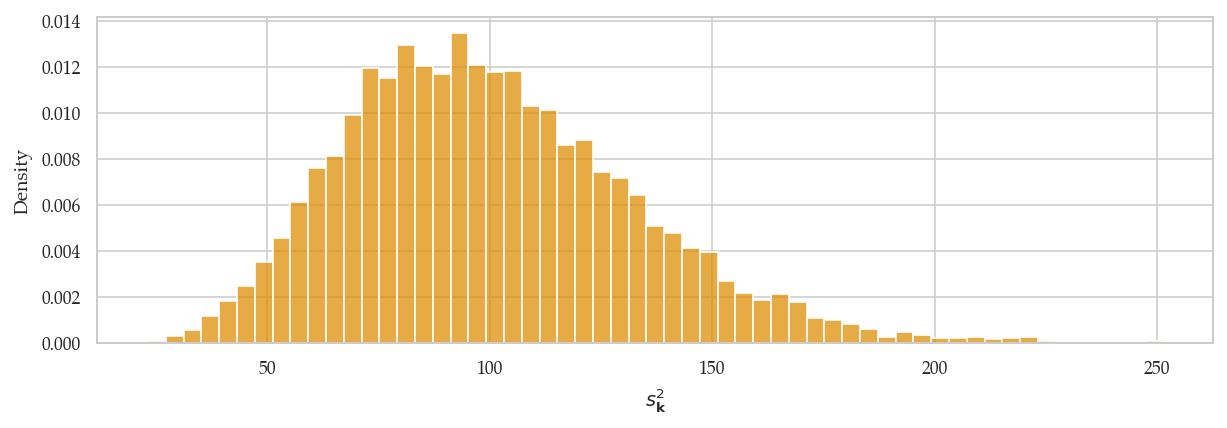

In [80]:
np.random.seed(16)
kvars = gen_sampling_dist(rvK, statfunc=var, n=20)
ax = sns.histplot(kvars, stat="density", color=orange)
_ = ax.set_xlabel("$s^2_{\mathbf{k}}$")

This is an unbiased estimator of the sample variance,
since its expected value equals the population variance:
$\mathbb{E}[S^2] \approx \sigma^2 = 100^2 = 10000$.

In [81]:
np.mean(kvars)

100.2961194772153

#### Biased estimator of the sample variance

Let's see what happens if we use the denominator $n$ instead of $(n-1)$ for the sample variance calculation.

In [82]:
def s2tilde(sample):
    xbar = mean(sample)
    sumsqdevs = sum([(xi-xbar)**2 for xi in sample])
    return sumsqdevs / len(sample)

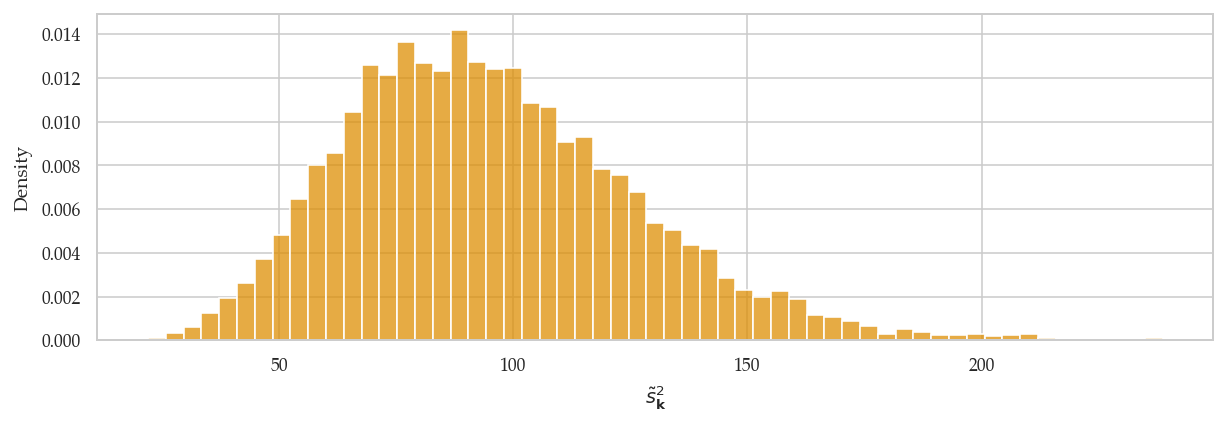

In [83]:
np.random.seed(16)
s2tildes = gen_sampling_dist(rvK, statfunc=s2tilde, n=20)
ax = sns.histplot(s2tildes, stat="density", color=orange)
_ = ax.set_xlabel("$\\tilde{s}^2_{\mathbf{k}}$")

Note the expected value of the sampling distribution for this estimator does not equal the population variance, $\mathbb{E}[\tilde{S}^2] \neq \sigma^2 = 100^2 = 10000$.

In [84]:
np.mean(s2tildes)

95.28131350335453

We can correct the bias in this estimator by simply using the normalization factor
$(n-1)$ in the formula instead of $n$.

### Pivotal quantities

Rephrase analytical approximations in terms of standard reference distributions, thanks to pivot transformation 

$$
  Y \;\; = \;\; \texttt{scale} \cdot X \; + \; \texttt{loc}.
$$

$$
  X \;\; = \;\; \frac{ Y - \texttt{loc} }{ \texttt{scale} }
$$

$$
 F_Y(y) = F_X\left(  \frac{ y - \texttt{loc} }{ \texttt{scale} }  \right).
$$





Recall the distribution for mean of kombucha volume,
when we use the estimated standard deviation $s$ is given by the $t$-distribution.

$$
  \overline{\mathbf{K}}
  \;\;\; = \;\;\;
  \stderrhat{\overline{\mathbf{k}}} \cdot \mathcal{T}(7-1)  \;\; + \;\; \mu_K
$$


In [85]:
from scipy.stats import t as tdist
rvT = tdist(7-1) # loc=0 and scale=1 by default

In [86]:
rvKbar.ppf(0.95), rvT.ppf(0.95)*sehat + muK

(1006.2571694064695, 1006.2571694064695)

In [87]:
rvKbar.cdf(1003), rvT.cdf( (1003-muK)/sehat )

(0.8062670118096588, 0.8062670118096588)

Recall the sampling distribution of the variance...

In [88]:
from scipy.stats import chi2
rvX2 = chi2(20-1) # loc=0 and scale=1 by default

In [89]:
scale = sigmaK**2 / (20-1)
rvS2.ppf(0.95), rvX2.ppf(0.95)*scale

(158.65014318761138, 158.65014318761138)

In [90]:
rvS2.cdf(150), rvX2.cdf(150/scale)

(0.9257325359937036, 0.9257325359937036)

## Discussion

### Statistical assumptions

- LARGEn:
- NORMAL:
- EQVAR: